# Diffusion of 2 chemicals in 1D

## Two symmetric initial concentration pulses (near the opposite edges of the system) diffusing out towards equilibrium, with identical diffusion rates

Symmetry is observed throughout

### TAGS :  "diffusion 1D", "basic"

In [1]:
LAST_REVISED = "Apr. 29, 2025"
LIFE123_VERSION = "1.0.0rc3"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from life123 import BioSim1D, ChemData, check_version

In [4]:
check_version(LIFE123_VERSION)

OK


## Prepare the initial system
with a non-zero bin concentration of the chemical `A`, near the left edge of the system,   
and an identical bin concentration of the chemical `B`, near the left edge

In [5]:
chem_data = ChemData(names=["A", "B"], diffusion_rates=[0.1, 0.1], plot_colors=["turquoise", "green"])

bio = BioSim1D(n_bins=10, chem_data=chem_data)

In [6]:
bio.inject_conc_to_bin(bin_address=2, chem_label="A", delta_conc=10.)
bio.inject_conc_to_bin(bin_address=7, chem_label="B", delta_conc=10.)

bio.describe_state()

SYSTEM STATE at Time t = 0:
10 bins and 2 chemical species:


Species  Diff rate  Bin 0  Bin 1  Bin 2  Bin 3  Bin 4  Bin 5  Bin 6  Bin 7  \
0       A        0.1    0.0    0.0   10.0    0.0    0.0    0.0    0.0    0.0   
1       B        0.1    0.0    0.0    0.0    0.0    0.0    0.0    0.0   10.0   

   Bin 8  Bin 9  
0    0.0    0.0  
1    0.0    0.0

In [7]:
bio.system_snapshot()

A     B
0   0.0   0.0
1   0.0   0.0
2  10.0   0.0
3   0.0   0.0
4   0.0   0.0
5   0.0   0.0
6   0.0   0.0
7   0.0  10.0
8   0.0   0.0
9   0.0   0.0

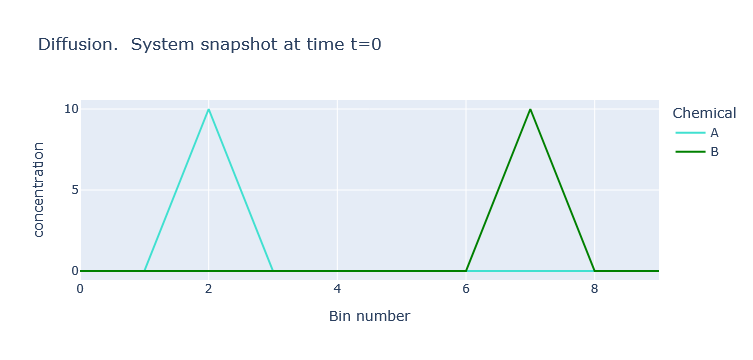

In [8]:
bio.visualize_system(title_prefix="Diffusion")   # Line curve view

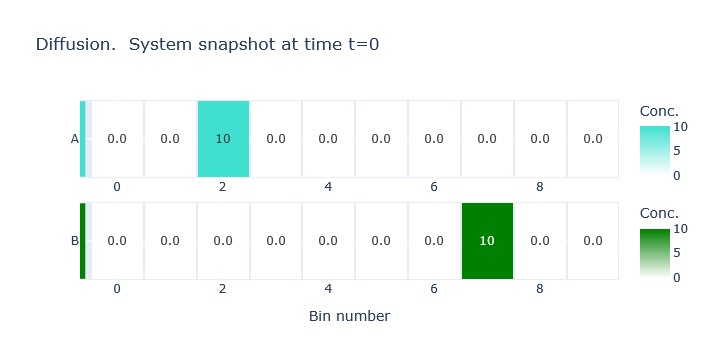

In [9]:
bio.system_heatmaps(title_prefix="Diffusion")

## Request history-keeping for some bins

In [10]:
# Request to save the concentration history at the bins with the initial concentration injection, 
# and the bins at the ends of the system
bio.enable_history(bins=[0, 2, 7, 9], frequency=3, take_snapshot=True)    

History enabled for bins [0, 2, 7, 9] and chemicals None (None means 'all')


# Initial Diffusion Step

In [11]:
# Advancing to time t=10, with time steps of 0.1 ...
delta_time = 10.

status = bio.diffuse(total_duration=delta_time, time_step=0.1)
print(status)

bio.describe_state(concise=True)

{'steps': 100}
SYSTEM STATE at Time t = 10:
[[1.22598070e+00 2.22414009e+00 3.08221111e+00 2.15823525e+00
  9.37782076e-01 2.88503658e-01 6.79378836e-02 1.28711509e-02
  2.03304706e-03 3.05037621e-04]
 [3.05037621e-04 2.03304706e-03 1.28711509e-02 6.79378836e-02
  2.88503658e-01 9.37782076e-01 2.15823525e+00 3.08221111e+00
  2.22414009e+00 1.22598070e+00]]


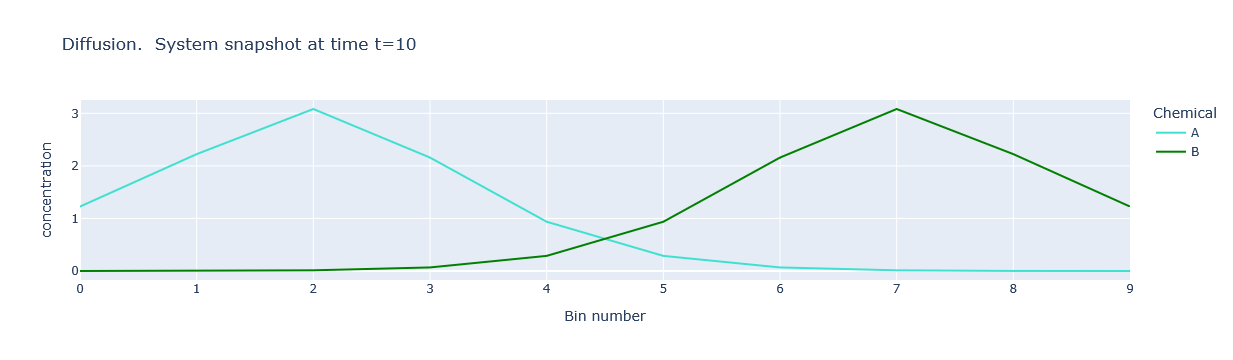

In [12]:
bio.visualize_system(title_prefix="Diffusion")   # Line curve view

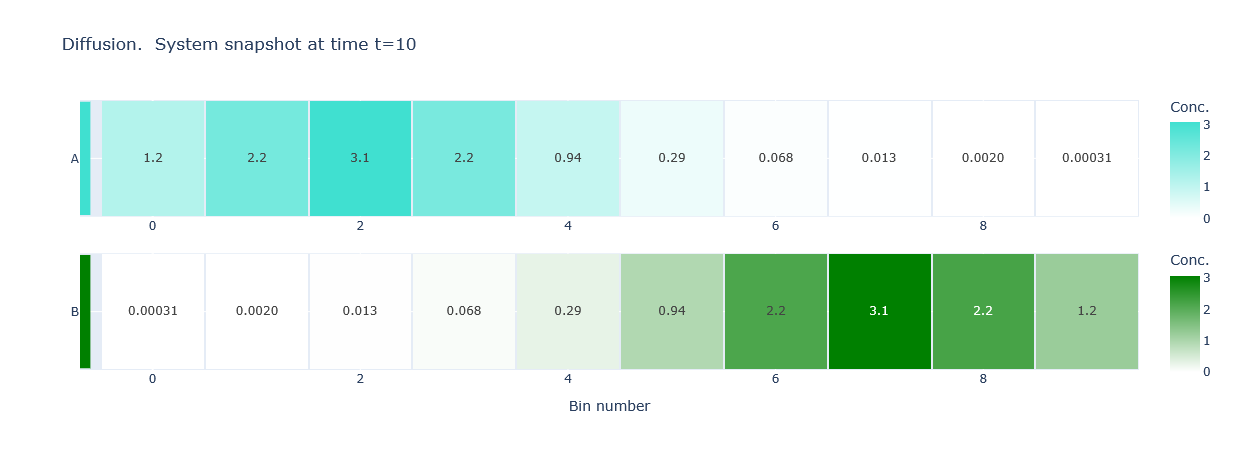

In [13]:
bio.system_heatmaps(title_prefix="Diffusion")

## This is still an early stage in the diffusion process; let's advance it more...  
(Visualization from results shown at selected times)

SYSTEM STATE at Time t = 20:
[[1.79154498 2.04604996 2.15752876 1.81408657 1.18572897 0.61493163
  0.26031377 0.09234937 0.02835038 0.00911562]
 [0.00911562 0.02835038 0.09234937 0.26031377 0.61493163 1.18572897
  1.81408657 2.15752876 2.04604996 1.79154498]]


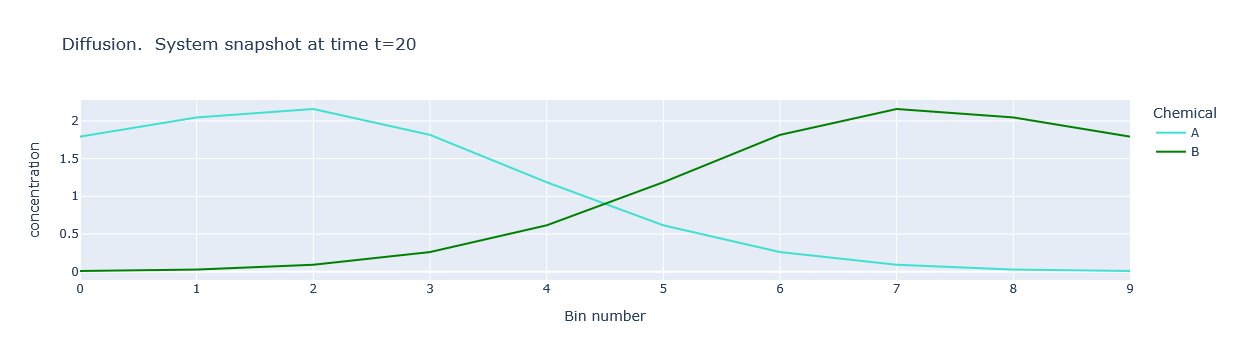

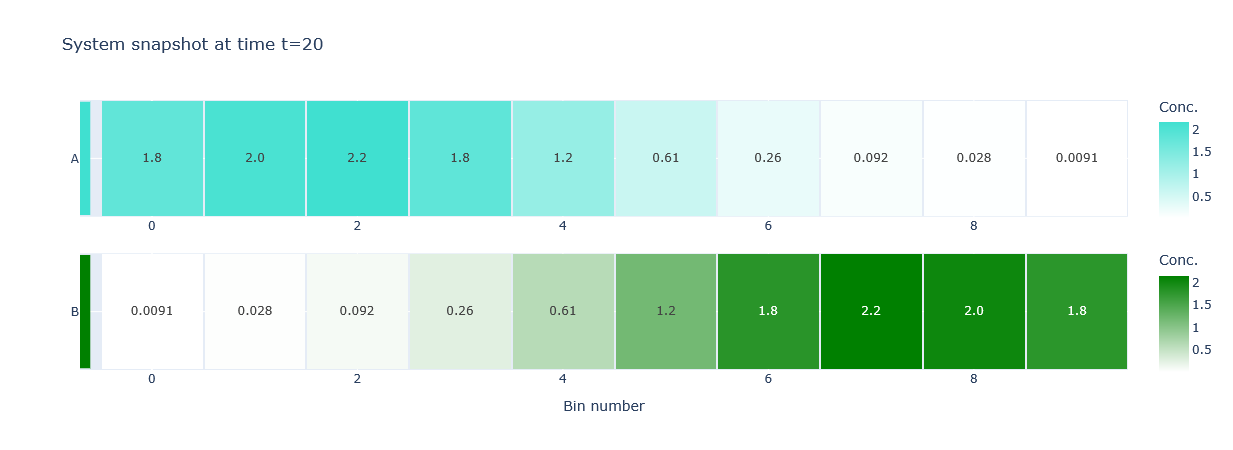

SYSTEM STATE at Time t = 30:
[[1.908894   1.93254508 1.86205856 1.60230147 1.1912129  0.75904212
  0.41665574 0.19951697 0.08641213 0.04136102]
 [0.04136102 0.08641213 0.19951697 0.41665574 0.75904212 1.1912129
  1.60230147 1.86205856 1.93254508 1.908894  ]]


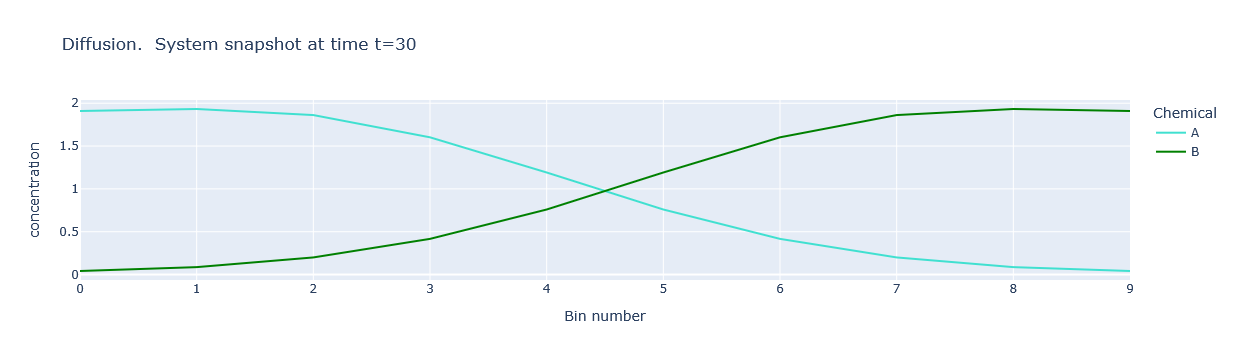

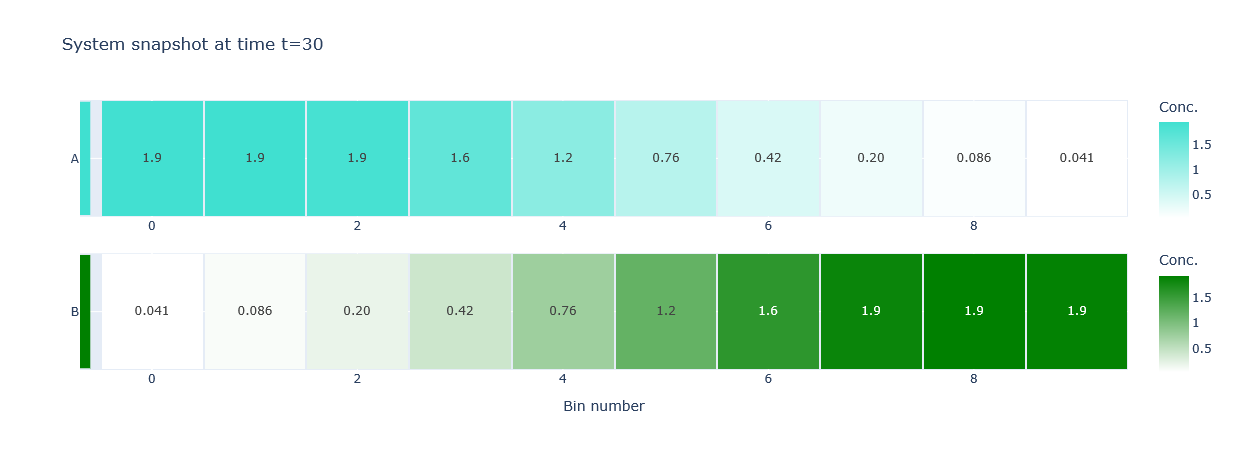

SYSTEM STATE at Time t = 80:
[[1.63637931 1.57533401 1.45817295 1.29515888 1.10189171 0.89806096
  0.7048592  0.54188555 0.42468407 0.36357336]
 [0.36357336 0.42468407 0.54188555 0.7048592  0.89806096 1.10189171
  1.29515888 1.45817295 1.57533401 1.63637931]]


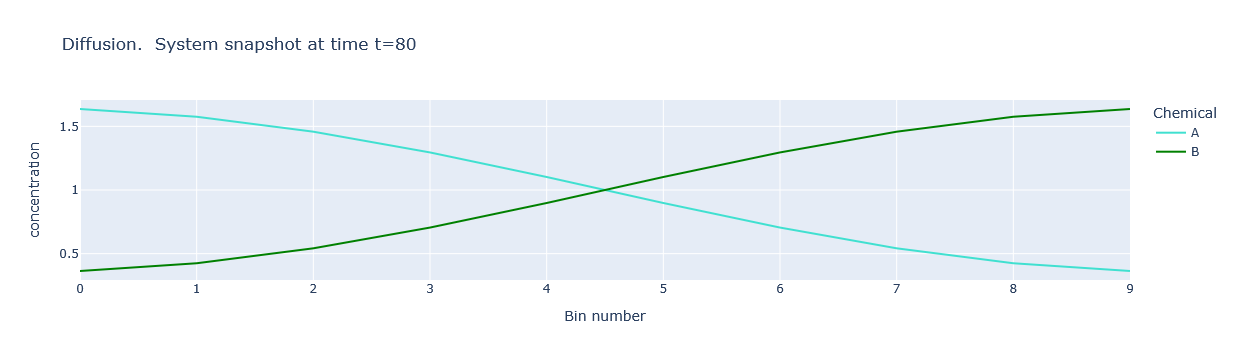

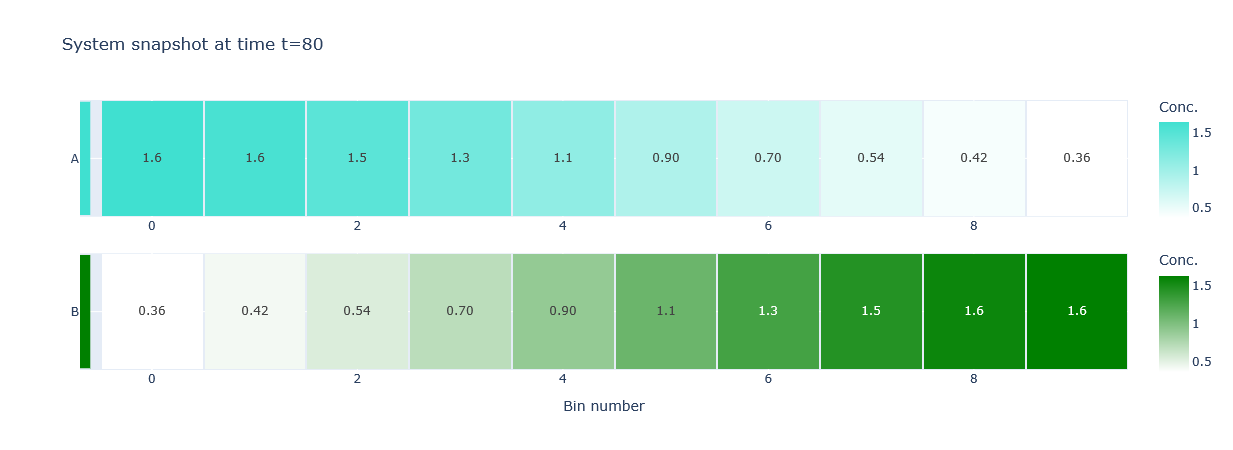

SYSTEM STATE at Time t = 510:
[[1.00946178 1.00853559 1.00677389 1.0043491  1.0014986  0.9985014
  0.9956509  0.99322611 0.99146441 0.99053822]
 [0.99053822 0.99146441 0.99322611 0.9956509  0.9985014  1.0014986
  1.0043491  1.00677389 1.00853559 1.00946178]]


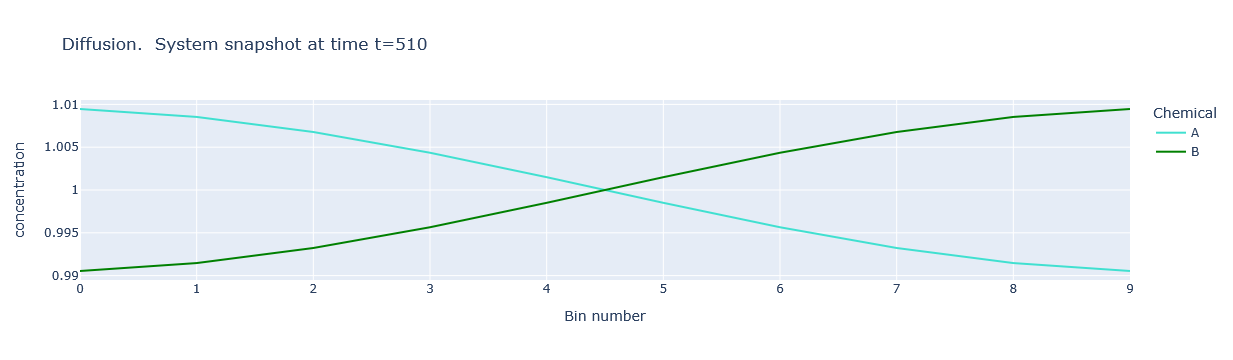

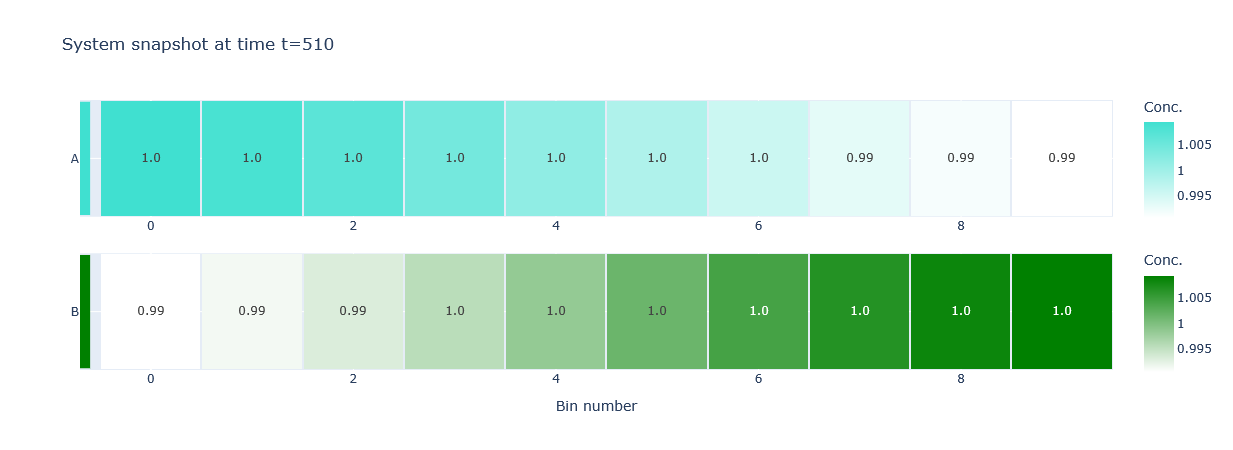

In [14]:
for i in range(50):
    status = bio.diffuse(total_duration=delta_time, time_step=0.1)

    if i<2 or i==6 or i>=49:
        bio.describe_state(concise=True)
    
        # Line curve view
        fig = bio.visualize_system(title_prefix="Diffusion")   # Line curve view
        fig.show()
        
        # Heatmap view
        fig = bio.system_heatmaps()
        fig.show()

## All bins now have essentially uniform concentration

**Mass conservations**: The initial "10 units of concentration" are now uniformly spread across the 10 bins, leading to a near-constant concentration of 10/10 = **1.0**

In [15]:
# Mass conservation can also be verified as follows:
bio.check_mass_conservation(chem_label="A", expected=10.)

True

In [16]:
bio.check_mass_conservation(chem_label="B", expected=10.)

True

## Visualization of time changes at particular bins

#### Instead of visualizing the entire system at a moment of time, like in the previous heatmaps, let's now look at the time evolution of the (only) chemical `A` at either of the bins whose history we requested prior to running the simulation

In [17]:
bio.conc_history.bin_history(bin_address=2)   # The bin where the initial concentration of `A` was applied

SYSTEM TIME          A             B
0             0.0  10.000000  0.000000e+00
1             0.3   9.417800  0.000000e+00
2             0.6   8.886104  5.880000e-09
3             0.9   8.400051  1.162426e-07
4             1.2   7.955274  6.880566e-07
...           ...        ...           ...
1679        508.7   1.006861  9.931393e-01
1680        509.0   1.006841  9.931594e-01
1681        509.3   1.006820  9.931795e-01
1682        509.6   1.006800  9.931995e-01
1683        509.9   1.006781  9.932195e-01

[1684 rows x 3 columns]

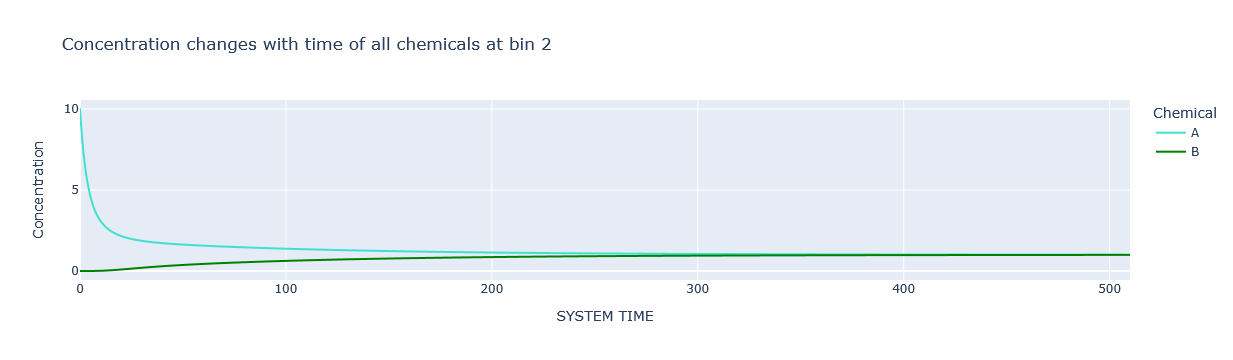

In [18]:
bio.plot_history_single_bin(bin_address=2)

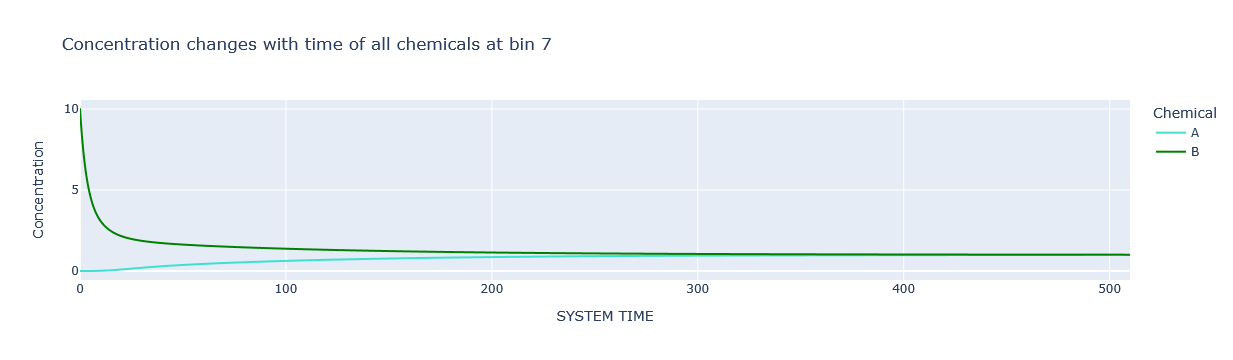

In [19]:
bio.plot_history_single_bin(bin_address=7)  # The bin where the initial concentration of `B` was applied

Notice the symmetery between bins 2 and 7 (if you switch `A` and `B`)

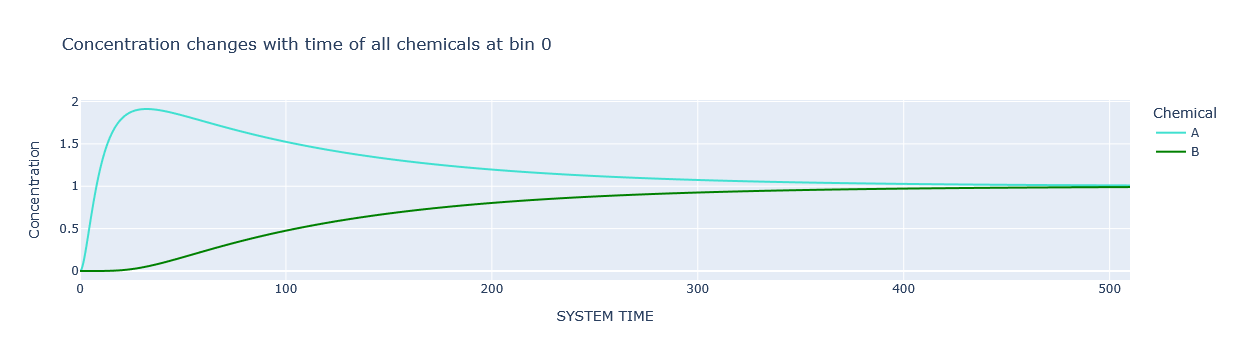

In [20]:
bio.plot_history_single_bin(bin_address=0)   # Left "edge" of the 1D system

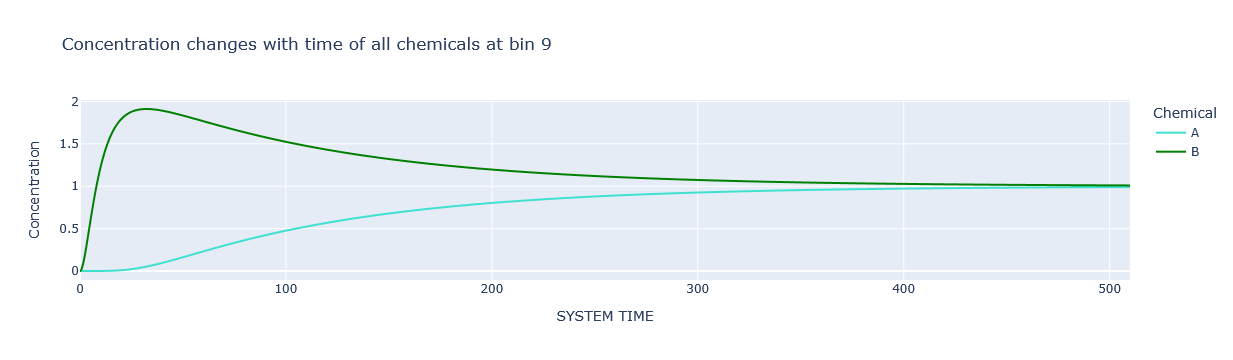

In [21]:
bio.plot_history_single_bin(bin_address=9)   # Right "edge" of the 1D system

Notice the symmetery between bins 0 and 9 (if you switch `A` and `B`)